In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
from google.colab import files
import io
uploaded = files.upload()

Saving FODS-A2.csv to FODS-A2.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['FODS-A2.csv']))

In [69]:
df

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,21.200000,33.290,19.823333,31.790000,23.463333,38.230000,20.50,31.730000,19.200000,39.363333,...,29.230000,9.85,756.183333,41.833333,4.833333,40.000000,-2.67,42.017180,42.017180,290
1,21.790000,38.500,19.500000,40.633333,22.500000,37.900000,21.00,37.900000,20.033333,47.290000,...,40.326667,6.90,754.000000,75.000000,4.000000,40.000000,2.80,24.624380,24.624380,50
2,22.390000,41.390,20.200000,43.790000,24.500000,39.333333,20.10,38.260000,19.390000,48.090000,...,42.060000,10.10,756.433333,68.000000,5.833333,40.000000,4.45,3.731260,3.731260,260
3,24.000000,30.260,24.390000,26.963333,23.390000,33.400000,22.79,31.200000,21.033333,40.626667,...,35.500000,19.10,760.000000,31.000000,4.000000,40.000000,1.50,1.058826,1.058826,50
4,20.050000,38.245,17.600000,41.000000,21.100000,37.200000,19.89,36.400000,18.200000,43.560000,...,38.863333,0.10,754.600000,99.000000,1.000000,32.000000,-0.10,39.248108,39.248108,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,22.066667,40.760,19.500000,44.000000,22.890000,39.700000,20.50,38.590000,20.000000,46.700000,...,40.930000,6.85,750.950000,95.000000,1.500000,34.500000,6.05,13.786652,13.786652,40
7890,22.823333,36.530,22.600000,34.560000,27.463333,38.193333,22.89,34.471429,20.730000,42.000000,...,37.966667,13.30,757.683333,57.500000,6.000000,40.000000,4.95,14.309959,14.309959,120
7891,23.100000,34.200,21.600000,33.663333,23.100000,36.000000,22.76,33.560000,21.856667,63.666667,...,33.764286,10.40,765.366667,57.500000,2.333333,40.000000,2.25,28.423231,28.423231,120
7892,21.600000,42.530,20.790000,41.826667,22.500000,43.790000,20.39,42.000000,19.000000,58.696667,...,47.626667,2.10,765.900000,90.000000,3.000000,25.500000,0.65,31.507612,31.507612,50


In [70]:
shuffled = df.sample(frac = 1, random_state = 99).reset_index().iloc[:, 1 : ]
shuffled

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,20.000000,38.730000,18.700000,39.730000,20.600000,38.790000,19.700000,36.863333,18.200000,51.400000,...,40.614286,3.400,759.500000,88.000000,1.000000,40.5,1.800,26.188815,26.188815,60
1,24.290000,40.400000,22.100000,41.400000,25.200000,39.060000,24.323333,40.790000,21.790000,38.621429,...,39.833333,9.500,758.150000,80.000000,2.000000,29.0,6.150,31.291260,31.291260,60
2,20.600000,43.900000,19.767500,43.522500,20.600000,44.400000,19.600000,45.590000,17.700000,52.700000,...,49.030000,8.380,763.850000,93.833333,2.166667,57.0,7.470,29.310536,29.310536,40
3,20.760000,38.090000,18.700000,39.000000,20.790000,39.863333,19.000000,39.090000,19.111111,62.895000,...,42.126667,0.500,740.100000,92.000000,2.000000,23.0,-0.700,44.148553,44.148553,50
4,21.600000,43.026667,20.700000,41.900000,23.633333,41.163333,20.790000,38.326667,20.000000,49.621429,...,41.133333,11.300,753.533333,57.666667,3.666667,40.0,3.100,15.294141,15.294141,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,23.100000,38.090000,22.100000,37.790000,21.890000,41.700000,21.633333,40.530000,18.700000,51.163333,...,39.900000,0.667,764.700000,96.333333,2.333333,25.0,0.133,27.563198,27.563198,100
7890,21.823333,42.326667,19.166667,45.626667,23.390000,39.090000,21.790000,39.466667,20.700000,47.400000,...,44.695000,4.830,753.400000,96.333333,1.000000,40.0,4.300,43.746831,43.746831,50
7891,21.600000,42.500000,21.000000,41.400000,23.100000,43.000000,20.290000,42.790000,20.200000,46.555000,...,46.933333,6.000,742.600000,80.000000,8.000000,26.0,2.700,19.939494,19.939494,50
7892,20.100000,42.366667,18.290000,42.500000,21.533333,39.090000,18.500000,39.730000,18.500000,52.064444,...,38.950000,2.970,734.200000,93.000000,5.000000,63.0,1.930,18.266959,18.266959,220


In [71]:
train_len = int(np.floor(0.8 * len(shuffled)))
print(train_len)

6315


In [72]:
df_train = shuffled.iloc[ : train_len, :]
df_train

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,20.00,38.730000,18.700000,39.7300,20.600000,38.790000,19.700000,36.863333,18.200000,51.400000,...,40.614286,3.40,759.500000,88.000000,1.000000,40.500000,1.80,26.188815,26.188815,60
1,24.29,40.400000,22.100000,41.4000,25.200000,39.060000,24.323333,40.790000,21.790000,38.621429,...,39.833333,9.50,758.150000,80.000000,2.000000,29.000000,6.15,31.291260,31.291260,60
2,20.60,43.900000,19.767500,43.5225,20.600000,44.400000,19.600000,45.590000,17.700000,52.700000,...,49.030000,8.38,763.850000,93.833333,2.166667,57.000000,7.47,29.310536,29.310536,40
3,20.76,38.090000,18.700000,39.0000,20.790000,39.863333,19.000000,39.090000,19.111111,62.895000,...,42.126667,0.50,740.100000,92.000000,2.000000,23.000000,-0.70,44.148553,44.148553,50
4,21.60,43.026667,20.700000,41.9000,23.633333,41.163333,20.790000,38.326667,20.000000,49.621429,...,41.133333,11.30,753.533333,57.666667,3.666667,40.000000,3.10,15.294141,15.294141,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,21.89,44.663333,20.856667,43.5000,23.038889,43.968889,21.500000,40.363333,18.890000,54.087778,...,43.430000,5.38,762.716667,80.000000,4.000000,40.000000,2.10,38.387860,38.387860,120
6311,20.00,37.230000,17.700000,39.4000,20.100000,36.530000,18.100000,37.200000,20.033333,81.400000,...,35.700000,3.07,744.233333,92.333333,3.000000,24.000000,1.87,39.849552,39.849552,90
6312,21.00,39.466667,19.263333,42.4000,21.890000,36.900000,21.500000,36.652857,19.790000,47.326667,...,39.200000,6.90,764.866667,93.000000,1.666667,21.333333,5.77,20.977061,20.977061,50
6313,20.89,35.790000,20.260000,34.5000,21.356667,34.966667,20.760000,34.790000,19.100000,40.790000,...,33.700000,7.80,752.900000,67.500000,6.000000,40.000000,2.15,3.725578,3.725578,70


In [73]:
df_train_normed = (df_train - df_train.mean()) / df_train.std()
df_train_normed

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,-1.041285,-0.368614,-0.733536,-0.162422,-0.828827,-0.119282,-0.569400,-0.479098,-0.749830,0.052553,...,-0.217494,-0.749628,0.525402,0.554044,-1.233609,0.191672,-0.459646,0.080525,0.080525,-0.361426
1,1.606961,0.051395,0.803883,0.243893,1.444654,-0.036460,1.683649,0.420486,1.170743,-1.348504,...,-0.405062,0.393846,0.341375,0.019421,-0.827053,-0.780352,0.572130,0.436634,0.436634,-0.361426
2,-0.670901,0.931652,-0.250832,0.760302,-0.828827,1.601580,-0.618132,1.520148,-1.017320,0.195087,...,1.803783,0.183896,1.118379,0.943873,-0.759294,1.586315,0.885220,0.298396,0.298396,-0.553450
3,-0.572132,-0.529575,-0.733536,-0.340032,-0.734922,0.209962,-0.910524,0.031022,-0.262405,1.312878,...,0.145748,-1.293246,-2.119140,0.821355,-0.827053,-1.287495,-1.052621,1.333967,1.333967,-0.457438
4,-0.053594,0.712007,0.170828,0.365544,0.670352,0.608735,-0.038219,-0.143854,0.213131,-0.142451,...,-0.092830,0.731264,-0.287954,-1.473067,-0.149461,0.149410,-0.151299,-0.679833,-0.679833,2.230906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.125425,1.123632,0.241670,0.754828,0.376557,1.469337,0.307779,0.322738,-0.380695,0.347244,...,0.458781,-0.378467,0.963887,0.019421,-0.013942,0.149410,-0.388489,0.931918,0.931918,0.214648
6311,-1.041285,-0.745867,-1.185718,-0.242711,-1.075944,-0.812535,-1.349114,-0.401969,0.230964,3.341787,...,-1.397802,-0.811488,-1.555698,0.843631,-0.420498,-1.202971,-0.443043,1.033932,1.033932,-0.073389
6312,-0.423978,-0.183341,-0.478807,0.487196,-0.191264,-0.699038,0.307779,-0.527318,0.100786,-0.394052,...,-0.557176,-0.093536,1.256968,0.888183,-0.962572,-1.428368,0.481998,-0.283212,-0.283212,-0.457438
6313,-0.491882,-1.108030,-0.028132,-1.434893,-0.454856,-1.292086,-0.052839,-0.954091,-0.268350,-1.110739,...,-1.878160,0.075173,-0.374287,-0.815927,0.799168,0.149410,-0.376630,-1.487224,-1.487224,-0.265414


In [74]:
df_test = shuffled.iloc[train_len : , :].reset_index().iloc[:, 1:]
df_test

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,19.323333,39.060000,17.730000,40.930000,19.890000,37.433333,21.066667,36.530000,17.50,48.560000,...,39.000000,3.400,746.800000,93.000000,6.000000,40.000000,2.400,32.884277,32.884277,70
1,20.356667,37.300000,19.066667,37.723333,20.000000,37.290000,19.000000,37.070000,17.60,46.290000,...,37.500000,3.000,747.400000,91.000000,2.000000,40.000000,1.700,5.673978,5.673978,510
2,20.890000,40.663333,18.445000,44.400000,21.730000,38.090000,19.790000,39.260000,19.29,48.500000,...,41.425000,7.000,753.700000,96.000000,5.000000,62.000000,6.400,5.591535,5.591535,90
3,21.790000,41.790000,21.100000,40.500000,22.600000,43.200000,18.890000,41.000000,19.20,50.802222,...,45.433333,3.370,738.900000,89.000000,8.666667,40.000000,1.750,29.717275,29.717275,60
4,16.823333,44.826667,16.200000,44.626667,17.290000,42.560000,15.160000,44.200000,15.39,50.035000,...,44.230000,7.350,770.366667,95.500000,4.000000,60.166667,6.630,4.255460,4.255460,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,23.100000,38.090000,22.100000,37.790000,21.890000,41.700000,21.633333,40.530000,18.70,51.163333,...,39.900000,0.667,764.700000,96.333333,2.333333,25.000000,0.133,27.563198,27.563198,100
1575,21.823333,42.326667,19.166667,45.626667,23.390000,39.090000,21.790000,39.466667,20.70,47.400000,...,44.695000,4.830,753.400000,96.333333,1.000000,40.000000,4.300,43.746831,43.746831,50
1576,21.600000,42.500000,21.000000,41.400000,23.100000,43.000000,20.290000,42.790000,20.20,46.555000,...,46.933333,6.000,742.600000,80.000000,8.000000,26.000000,2.700,19.939494,19.939494,50
1577,20.100000,42.366667,18.290000,42.500000,21.533333,39.090000,18.500000,39.730000,18.50,52.064444,...,38.950000,2.970,734.200000,93.000000,5.000000,63.000000,1.930,18.266959,18.266959,220


In [75]:
df_test_normed = (df_test - df_train.mean()) / df_train.std()
df_test_normed

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,-1.458995,-0.285618,-1.172152,0.129541,-1.179733,-0.535438,0.096606,-0.555464,-1.124316,-0.258828,...,-0.605212,-0.749628,-1.205819,0.888183,0.799168,0.149410,-0.317332,0.547813,0.547813,-0.265414
1,-0.821112,-0.728262,-0.567736,-0.650648,-1.125367,-0.579406,-0.910524,-0.431752,-1.070818,-0.507713,...,-0.965480,-0.824609,-1.124029,0.754528,-0.827053,0.149410,-0.483365,-1.351241,-1.351241,3.959127
2,-0.491882,0.117624,-0.848842,0.973800,-0.270341,-0.334007,-0.525541,0.069969,-0.166704,-0.265406,...,-0.022778,-0.074791,-0.265234,1.088667,0.392613,2.008934,0.631427,-1.356995,-1.356995,-0.073389
3,0.063694,0.400983,0.351701,0.024921,0.159643,1.233481,-0.964130,0.468596,-0.214852,-0.012988,...,0.939939,-0.755251,-2.282720,0.620872,1.883316,0.149410,-0.471506,0.326782,0.326782,-0.361426
4,-3.002262,1.164711,-1.863991,1.028949,-2.464744,1.037161,-2.781838,1.201704,-2.253121,-0.097107,...,0.650924,-0.009182,2.006709,1.055253,-0.013942,1.853974,0.685981,-1.450242,-1.450242,0.310660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,0.872366,-0.529575,0.803883,-0.634428,-0.191264,0.773357,0.372755,0.360921,-0.482341,0.026605,...,-0.389051,-1.261941,1.234248,1.110943,-0.691535,-1.118447,-0.855042,0.176446,0.176446,0.022623
1575,0.084271,0.535955,-0.522518,1.272251,0.550089,-0.027258,0.449102,0.117315,0.587616,-0.386011,...,0.762607,-0.481567,-0.306129,1.110943,-1.233609,0.149410,0.133328,1.305930,1.305930,-0.457438
1576,-0.053594,0.579549,0.306483,0.243893,0.406760,1.172131,-0.281880,0.878678,0.320127,-0.478658,...,1.300208,-0.262246,-1.778348,0.019421,1.612279,-1.033923,-0.246175,-0.355626,-0.355626,-0.457438
1577,-0.979554,0.546015,-0.918930,0.511526,-0.367541,-0.027258,-1.154185,0.177644,-0.589337,0.125404,...,-0.617220,-0.830233,-2.923407,0.888183,0.392613,2.093458,-0.428812,-0.472355,-0.472355,1.174771


In [76]:
x_train = copy.deepcopy(df_train_normed.iloc[:, : -1].T)
x_train

,0,1,2,3,4,5,6,7,8,9,...,6305,6306,6307,6308,6309,6310,6311,6312,6313,6314
T1,-1.041285,1.606961,-0.670901,-0.572132,-0.053594,0.193329,0.742732,-0.609170,-0.979554,0.413501,...,1.977345,-1.041285,-1.041285,0.952616,-0.979554,0.125425,-1.041285,-0.423978,-0.491882,-1.788226
RH_1,-0.368614,0.051395,0.931652,-0.529575,0.712007,-0.041661,0.016184,-1.132342,1.183154,0.805901,...,1.962811,1.106446,-0.191724,2.407131,1.015486,1.123632,-0.745867,-0.183341,-1.108030,1.608193
T2,-0.733536,0.803883,-0.250832,-0.733536,0.170828,-0.404950,0.080392,-1.230936,-0.421530,0.532573,...,2.033171,-0.552663,-0.692840,1.132468,-0.677767,0.241670,-1.185718,-0.478807,-0.028132,-1.004845
RH_2,-0.162422,0.243893,0.760302,-0.340032,0.365544,0.730498,0.582083,-0.348142,0.918449,-0.219598,...,1.363084,0.736580,-0.429243,-0.196484,-0.283262,0.754828,-0.242711,0.487196,-1.434893,1.506632
T3,-0.828827,1.444654,-0.828827,-0.734922,0.670352,0.357337,0.456184,-0.087474,-1.273638,0.055854,...,1.840041,-1.179733,-0.103949,1.327685,-0.369894,0.376557,-1.075944,-0.191264,-0.454856,-1.323061
RH_3,-0.119282,-0.036460,1.601580,0.209962,0.608735,0.006485,0.098509,-0.995562,1.478880,-0.732780,...,1.443987,1.754954,-0.261409,1.283583,-0.477740,1.469337,-0.812535,-0.699038,-1.292086,1.785629
T4,-0.569400,1.683649,-0.618132,-0.910524,-0.038219,0.112850,-0.423203,-0.585644,-0.878036,0.600171,...,2.129664,-0.569400,-0.666864,0.161582,-1.089209,0.307779,-1.349114,0.307779,-0.052839,-1.500183
RH_4,-0.479098,0.420486,1.520148,0.031022,-0.143854,-0.143854,0.514415,-1.212206,1.720989,-0.507681,...,1.362071,1.041337,-0.724995,0.942062,-0.738741,0.322738,-0.401969,-0.527318,-0.954091,1.902738
T5,-0.749830,1.170743,-1.017320,-0.262405,0.213131,0.421773,0.421773,-0.321847,-1.064873,0.922870,...,2.294199,-0.969172,-0.701682,-0.380695,-1.183163,-0.380695,0.230964,0.100786,-0.268350,-1.236661
RH_5,0.052553,-1.348504,0.195087,1.312878,-0.142451,-0.427362,0.092024,-0.550473,0.604413,3.294276,...,0.073385,0.008697,-0.938237,0.246557,-0.739995,0.347244,3.341787,-0.394052,-1.110739,0.249237


In [77]:
y_train = copy.deepcopy(df_train.iloc[:, -1])
y_train

0        60
1        60
2        40
3        50
4       330
       ... 
6310    120
6311     90
6312     50
6313     70
6314     40
Name: Appliances, Length: 6315, dtype: int64

In [78]:
y_train_normed = (y_train - y_train.mean()) / y_train.std()
y_train_normed

0      -0.361426
1      -0.361426
2      -0.553450
3      -0.457438
4       2.230906
          ...   
6310    0.214648
6311   -0.073389
6312   -0.457438
6313   -0.265414
6314   -0.553450
Name: Appliances, Length: 6315, dtype: float64

In [79]:
y_train.to_numpy().reshape(-1, 1)

array([[60],
       [60],
       [40],
       ...,
       [50],
       [70],
       [40]])

In [80]:
x_test = copy.deepcopy(df_test_normed.iloc[:, : -1].T)
x_test

,0,1,2,3,4,5,6,7,8,9,...,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578
T1,-1.458995,-0.821112,-0.491882,0.063694,-3.002262,-0.300517,0.563713,2.436209,-0.183228,-0.115325,...,1.907196,0.193329,-0.053594,-1.681226,-0.800535,0.872366,0.084271,-0.053594,-0.979554,0.742732
RH_1,-0.285618,-0.728262,0.117624,0.400983,1.164711,1.183154,0.979437,-2.365540,-0.385381,0.350682,...,1.999964,0.335592,0.990336,-0.285618,-1.080365,-0.529575,0.535955,0.579549,0.546015,-0.753412
T2,-1.172152,-0.567736,-0.848842,0.351701,-1.863991,-0.281354,-0.055263,2.808556,-0.840552,-0.692840,...,1.959187,0.170828,0.256742,-1.185718,-0.823972,0.803883,-0.522518,0.306483,-0.918930,0.849101
RH_2,0.129541,-0.650648,0.973800,0.024921,1.028949,1.136002,1.606386,-3.051231,0.712656,1.325372,...,1.159616,0.411772,0.696436,-0.242711,-0.850967,-0.634428,1.272251,0.243893,0.511526,-1.215921
T3,-1.179733,-1.125367,-0.270341,0.159643,-2.464744,-0.191264,1.197536,1.444654,0.390286,-0.701973,...,2.157475,0.406760,-0.828827,-1.637724,-1.075944,-0.191264,0.550089,0.406760,-0.367541,0.357337
RH_3,-0.535438,-0.579406,-0.334007,1.233481,1.037161,1.305055,0.494216,-0.975112,-0.640756,-0.119282,...,1.106598,-0.065090,2.049433,0.006485,-0.392289,0.773357,-0.027258,1.172131,-0.027258,-0.852412
T4,0.096606,-0.910524,-0.525541,-0.964130,-2.781838,-0.082078,0.324023,1.716137,-0.374471,0.028381,...,1.566472,0.254173,-1.544042,-1.544042,-1.300381,0.372755,0.449102,-0.281880,-1.154185,0.985155
RH_4,-0.555464,-0.431752,0.069969,0.468596,1.201704,1.132975,0.947407,-0.928891,0.268519,-0.388224,...,1.636657,0.354048,1.774445,-0.135454,-0.569973,0.360921,0.117315,0.878678,0.177644,-1.114459
T5,-1.124316,-1.070818,-0.166704,-0.214852,-2.253121,-0.628569,0.855106,1.170743,-0.113206,-0.434193,...,1.829394,0.534119,-0.341761,-1.338307,-1.338307,-0.482341,0.587616,0.320127,-0.589337,0.587616
RH_5,-0.258828,-0.507713,-0.265406,-0.012988,-0.097107,0.505371,1.747239,-0.613334,-0.452892,-0.415980,...,0.111698,-0.562533,-0.012561,-0.243478,-0.579637,0.026605,-0.386011,-0.478658,0.125404,-1.032894


In [81]:
y_test = copy.deepcopy(df_test.iloc[:, -1])
y_test

0        70
1       510
2        90
3        60
4       130
       ... 
1574    100
1575     50
1576     50
1577    220
1578    200
Name: Appliances, Length: 1579, dtype: int64

In [82]:
y_test_normed = (y_test - y_test.mean()) / y_test.std()
y_test_normed

0      -0.288959
1       3.898720
2      -0.098610
3      -0.384134
4       0.282088
          ...   
1574   -0.003436
1575   -0.479308
1576   -0.479308
1577    1.138659
1578    0.948310
Name: Appliances, Length: 1579, dtype: float64

In [83]:
df_train_normed.corr()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
T1,1.000000,0.174562,0.837360,0.008374,0.892922,-0.013857,0.877828,0.113294,0.887697,-0.004334,...,0.081609,0.686891,-0.161218,-0.338569,-0.091053,-0.067400,0.578806,-0.006518,-0.006518,0.038151
RH_1,0.174562,1.000000,0.269112,0.798236,0.256195,0.846863,0.117814,0.883700,0.208878,0.297980,...,0.769045,0.344224,-0.282332,0.281609,0.196622,-0.019732,0.648003,-0.010458,-0.010458,0.077535
T2,0.837360,0.269112,1.000000,-0.165962,0.735103,0.127161,0.761286,0.236481,0.721584,0.042042,...,0.158961,0.796314,-0.138998,-0.503711,0.050838,-0.058280,0.585999,-0.016442,-0.016442,0.104107
RH_2,0.008374,0.798236,-0.165962,1.000000,0.137494,0.679541,-0.034581,0.722081,0.112181,0.241354,...,0.677166,0.030792,-0.248372,0.594255,0.055060,-0.009514,0.501998,0.005085,0.005085,-0.064780
T3,0.892922,0.256195,0.735103,0.137494,1.000000,-0.002613,0.852867,0.131910,0.887839,-0.057215,...,0.135849,0.700311,-0.198645,-0.277371,-0.103805,-0.097906,0.647411,-0.001368,-0.001368,0.073009
RH_3,-0.013857,0.846863,0.127161,0.679541,-0.002613,1.000000,-0.124900,0.900428,-0.042281,0.359841,...,0.837250,0.126154,-0.223141,0.363076,0.247285,0.025986,0.428860,-0.008789,-0.008789,0.030070
T4,0.877828,0.117814,0.761286,-0.034581,0.852867,-0.124900,1.000000,-0.034166,0.873129,-0.065230,...,-0.014427,0.669697,-0.094636,-0.383134,-0.182671,-0.098089,0.528577,-0.008682,-0.008682,0.034465
RH_4,0.113294,0.883700,0.236481,0.722081,0.131910,0.900428,-0.034166,1.000000,0.099489,0.343607,...,0.856808,0.296832,-0.241659,0.343498,0.285651,0.009263,0.624687,-0.002837,-0.002837,0.013843
T5,0.887697,0.208878,0.721584,0.112181,0.887839,-0.042281,0.873129,0.099489,1.000000,0.044287,...,0.075447,0.654695,-0.184402,-0.271709,-0.149039,-0.076030,0.590626,-0.002349,-0.002349,0.004402
RH_5,-0.004334,0.297980,0.042042,0.241354,-0.057215,0.359841,-0.065230,0.343607,0.044287,1.000000,...,0.267561,-0.039008,-0.121060,0.175149,0.070619,-0.022669,0.086727,-0.026834,-0.026834,0.012830


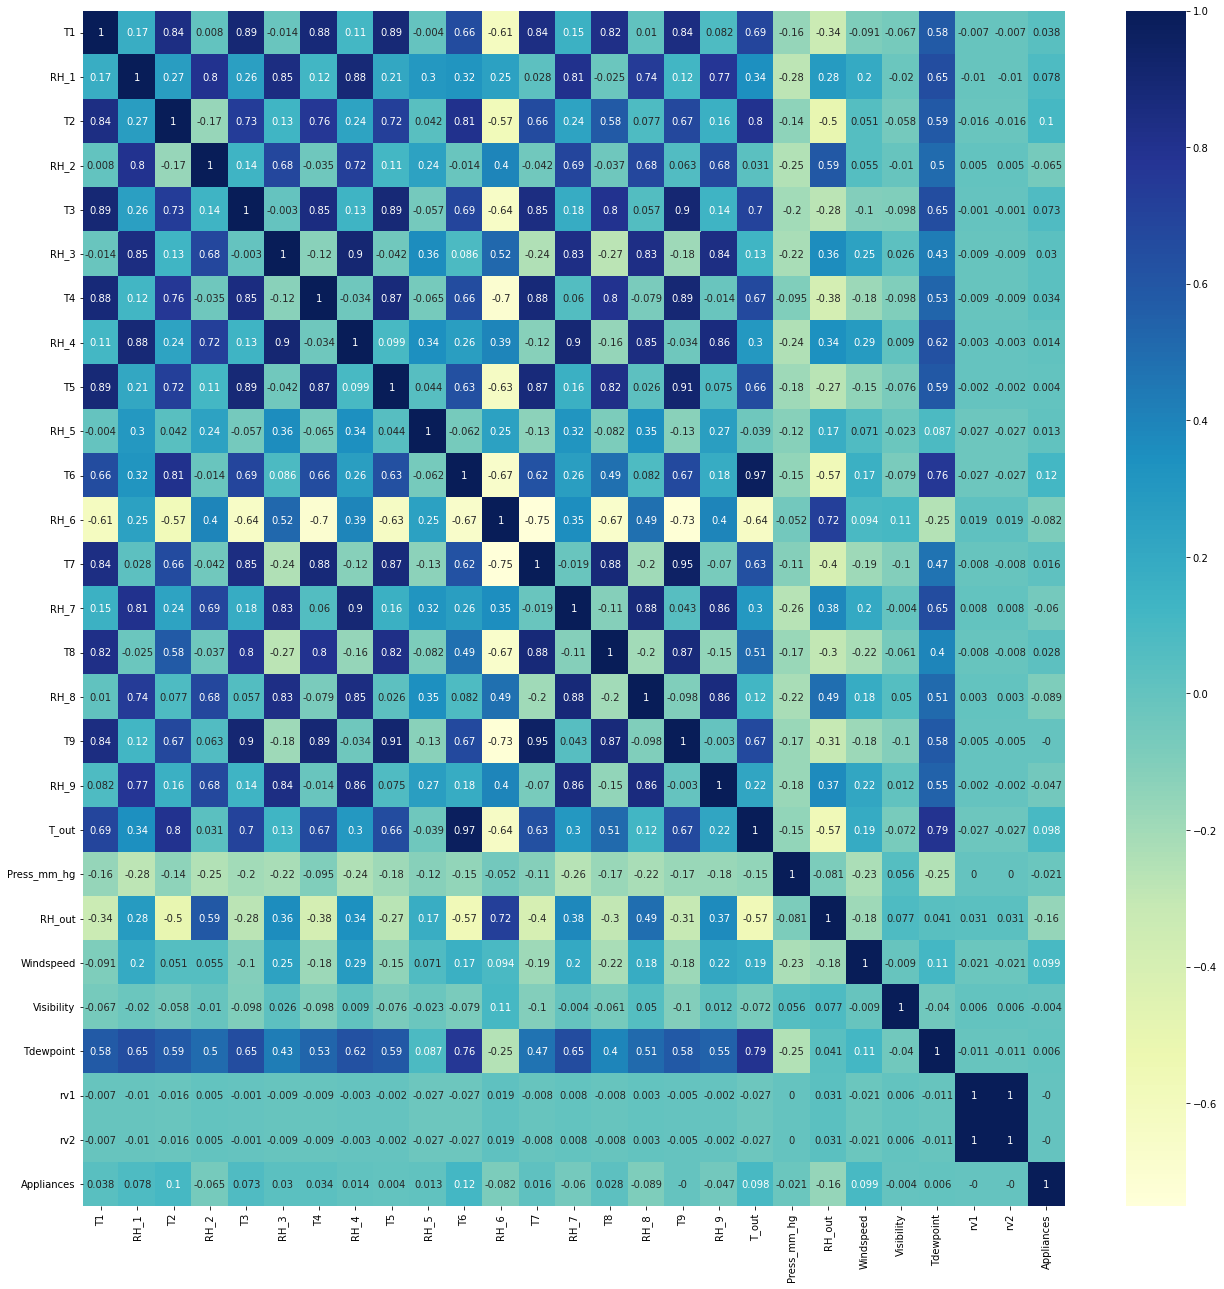

In [84]:
plt.figure(figsize = (22, 22))
sns.heatmap(df_train_normed.corr().round(3), cmap = "YlGnBu", annot = True)

In [85]:
df_train_normed_corr_sorted = df_train_normed.corr().sort_values(by = "Appliances", ascending = False, key = lambda col: np.abs(col))
df_train_normed_corr_sorted
#sorted based on correlation with appliances column

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
Appliances,0.038151,0.077535,0.104107,-0.064780,0.073009,0.030070,0.034465,0.013843,0.004402,0.012830,...,-0.046869,0.098223,-0.020707,-0.161303,0.099430,-0.004089,0.006252,-0.000477,-0.000477,1.000000
RH_out,-0.338569,0.281609,-0.503711,0.594255,-0.277371,0.363076,-0.383134,0.343498,-0.271709,0.175149,...,0.367486,-0.571379,-0.080927,1.000000,-0.185205,0.077126,0.040914,0.030638,0.030638,-0.161303
T6,0.657704,0.318040,0.804679,-0.014078,0.686383,0.085632,0.655482,0.263250,0.630709,-0.061606,...,0.184755,0.974923,-0.152414,-0.568538,0.164893,-0.078650,0.761972,-0.026930,-0.026930,0.115728
T2,0.837360,0.269112,1.000000,-0.165962,0.735103,0.127161,0.761286,0.236481,0.721584,0.042042,...,0.158961,0.796314,-0.138998,-0.503711,0.050838,-0.058280,0.585999,-0.016442,-0.016442,0.104107
Windspeed,-0.091053,0.196622,0.050838,0.055060,-0.103805,0.247285,-0.182671,0.285651,-0.149039,0.070619,...,0.219018,0.186891,-0.226667,-0.185205,1.000000,-0.009137,0.113584,-0.020515,-0.020515,0.099430
T_out,0.686891,0.344224,0.796314,0.030792,0.700311,0.126154,0.669697,0.296832,0.654695,-0.039008,...,0.223197,1.000000,-0.154821,-0.571379,0.186891,-0.072151,0.790008,-0.026728,-0.026728,0.098223
RH_8,0.010354,0.743679,0.076961,0.682685,0.056985,0.831863,-0.079022,0.848949,0.026115,0.348694,...,0.857049,0.124422,-0.221231,0.490967,0.185240,0.049842,0.512680,0.002890,0.002890,-0.088983
RH_6,-0.609660,0.252935,-0.575342,0.394980,-0.644430,0.516730,-0.697927,0.393490,-0.629865,0.249259,...,0.394635,-0.637856,-0.051630,0.720146,0.093530,0.106603,-0.252915,0.018633,0.018633,-0.081840
RH_1,0.174562,1.000000,0.269112,0.798236,0.256195,0.846863,0.117814,0.883700,0.208878,0.297980,...,0.769045,0.344224,-0.282332,0.281609,0.196622,-0.019732,0.648003,-0.010458,-0.010458,0.077535
T3,0.892922,0.256195,0.735103,0.137494,1.000000,-0.002613,0.852867,0.131910,0.887839,-0.057215,...,0.135849,0.700311,-0.198645,-0.277371,-0.103805,-0.097906,0.647411,-0.001368,-0.001368,0.073009


In [86]:
featurelist_corr = list(df_train_normed_corr_sorted.index)[1:]
print(featurelist_corr)
featurelist_corr[:26]
# len(featurelist_corr)
# for i in range(1,5):
#   print(i)

['RH_out', 'T6', 'T2', 'Windspeed', 'T_out', 'RH_8', 'RH_6', 'RH_1', 'T3', 'RH_2', 'RH_7', 'RH_9', 'T1', 'T4', 'RH_3', 'T8', 'Press_mm_hg', 'T7', 'RH_4', 'RH_5', 'Tdewpoint', 'T5', 'Visibility', 'rv1', 'rv2', 'T9']


['RH_out',
 'T6',
 'T2',
 'Windspeed',
 'T_out',
 'RH_8',
 'RH_6',
 'RH_1',
 'T3',
 'RH_2',
 'RH_7',
 'RH_9',
 'T1',
 'T4',
 'RH_3',
 'T8',
 'Press_mm_hg',
 'T7',
 'RH_4',
 'RH_5',
 'Tdewpoint',
 'T5',
 'Visibility',
 'rv1',
 'rv2',
 'T9']

In [87]:
corr_table = pd.DataFrame({"Feature" : list(df_train_normed_corr_sorted.index)[1:], "Correlation with Appliances" : df_train_normed_corr_sorted['Appliances'][1:]})
corr_table

,Feature,Correlation with Appliances
RH_out,RH_out,-0.161303
T6,T6,0.115728
T2,T2,0.104107
Windspeed,Windspeed,0.099430
T_out,T_out,0.098223
RH_8,RH_8,-0.088983
RH_6,RH_6,-0.081840
RH_1,RH_1,0.077535
T3,T3,0.073009
RH_2,RH_2,-0.064780


In [88]:
#list of x_train based on descending order of correlation with appliances column
# x_train_list_corr = [x_train_normed.loc[featurelist_corr[:i+1], :] for i in range(len(featurelist_corr))]

x_train_list_corr = [pd.concat([pd.DataFrame(np.ones((1, x_train.shape[1])), index = ['Const']), x_train.loc[featurelist_corr[:i+1], :]]) for i in range(len(featurelist_corr))]
# x_train_list_corr = []

# for i in range(len(featurelist_corr)):
#   x_train_list_corr.append(x_train_normed.loc[featurelist_corr[:i+1], :])

In [89]:
x_train_list_corr[3]
# pd.concat([pd.DataFrame(np.ones((1, x_train_normed.shape[1])), index = ['Const']), x_train_list_corr[2]])

,0,1,2,3,4,5,6,7,8,9,...,6305,6306,6307,6308,6309,6310,6311,6312,6313,6314
Const,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RH_out,0.554044,0.019421,0.943873,0.821355,-1.473067,-0.359270,1.044115,0.609734,0.052835,-1.896310,...,-0.359270,0.086249,0.620872,-0.626581,0.219905,0.019421,0.843631,0.888183,-0.815927,0.676562
T6,-1.101886,0.235035,0.042083,-1.183245,0.815777,0.327389,-0.012339,-0.865506,0.393905,0.871613,...,1.872105,-0.030480,-1.205234,0.004153,-0.634623,-0.376804,-0.721479,0.447778,0.360372,-0.309738
T2,-0.733536,0.803883,-0.250832,-0.733536,0.170828,-0.404950,0.080392,-1.230936,-0.421530,0.532573,...,2.033171,-0.552663,-0.692840,1.132468,-0.677767,0.241670,-1.185718,-0.478807,-0.028132,-1.004845
Windspeed,-1.233609,-0.827053,-0.759294,-0.827053,-0.149461,-0.284979,-0.827053,0.731409,2.425390,-0.013942,...,-0.420498,1.612279,-0.827053,3.102982,-0.013942,-0.013942,-0.420498,-0.962572,0.799168,-0.827053


In [90]:
# x_test_list_corr = [x_test.loc[featurelist_corr[:i+1], :] for i in range(len(featurelist_corr))]
x_test_list_corr = [pd.concat([pd.DataFrame(np.ones((1, x_test.shape[1])), index = ['Const']), x_test.loc[featurelist_corr[:i+1], :]]) for i in range(len(featurelist_corr))]

In [91]:
x_test_list_corr[3]

,0,1,2,3,4,5,6,7,8,9,...,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578
Const,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RH_out,0.888183,0.754528,1.088667,0.620872,1.055253,0.453802,0.821355,-3.589282,0.554044,0.654286,...,-0.381546,-0.737961,1.088667,0.765666,1.300288,1.110943,1.110943,0.019421,0.888183,-1.450791
T6,-0.726977,-0.612635,-0.035977,-0.770954,0.031089,0.350477,0.294405,2.928669,-0.160764,-0.552165,...,2.610782,0.891403,0.020644,-2.220844,-1.117279,-1.090892,-0.550202,-0.391647,-0.536223,1.310840
T2,-1.172152,-0.567736,-0.848842,0.351701,-1.863991,-0.281354,-0.055263,2.808556,-0.840552,-0.692840,...,1.959187,0.170828,0.256742,-1.185718,-0.823972,0.803883,-0.522518,0.306483,-0.918930,0.849101
Windspeed,0.799168,-0.827053,0.392613,1.883316,-0.013942,1.815557,-1.233609,-0.013942,2.018834,-0.420498,...,-0.827053,2.018834,0.121576,-1.211022,-0.759294,-0.691535,-1.233609,1.612279,0.392613,-0.217220


In [92]:
def cost(X, Y, W):
  J = (1 / (2 * len(Y))) * np.sum((np.dot(W.T, X) - Y) ** 2)
  # print("cost:" + str(J))
  return J

In [93]:
def gradDescent(x, y, w, alpha, iter):
  cost_new = cost(x, y, w)
  cost_hist = [cost_new]

  for _ in range(iter):
    cost_old = cost_new
    diff = np.dot(w.T, x) - y
    grad = (1 / len(y)) * np.dot(x, diff.T)
    w = w - alpha * grad
    cost_new = cost(x, y, w)
    cost_hist.append(cost_new)
    # if(abs(cost_old - cost_new) <= 10 ** (-20)):
    #   break

  return w, cost_hist

In [94]:
def stochGradDescent(x, y, w, alpha):
  cost_new = cost(x[:, 0:1], y[0, 0:1], w)
  cost_hist = [cost_new]

  for exNo in range(x.shape[1]):
    cost_old = cost_new
    x_arr = x[:, exNo : exNo + 1]
    y_arr = y[0, exNo : exNo + 1]
    diff = np.dot(w.T, x_arr) - y_arr
    grad = np.dot(x_arr, diff.T)
    w = w - alpha * grad
    cost_new = cost(x_arr, y_arr, w)
    cost_hist.append(cost_new)
    # cost(x, y, W_mod)
    # print(w)
    # if(abs(cost_old - cost_new) <= 10 ** (-20)):
    #   break
  
  return w, cost_hist

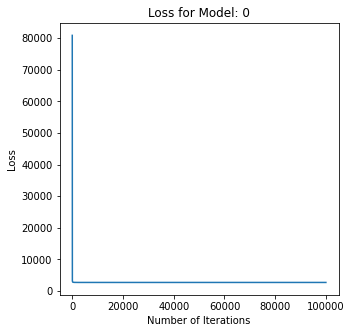

[2711.256628560268]
[678.755973508876]
[['RH_out', 'T6', 'T2', 'Windspeed', 'T_out', 'RH_8', 'RH_6', 'RH_1', 'T3', 'RH_2', 'RH_7', 'RH_9', 'T1', 'T4', 'RH_3', 'T8', 'Press_mm_hg', 'T7', 'RH_4', 'RH_5', 'Tdewpoint', 'T5', 'Visibility', 'rv1', 'rv2', 'T9']]


In [95]:
#runner code for one model grad desc
train_err = []
test_err = []
W_list = []
feature_list_each_model = []

cost_history_each_model = []

for i in range(25, 26):#len(x_train_list_corr)):

  W = np.random.rand(x_train_list_corr[i].shape[0], 1)
  # W = np.zeros((x_train_list_corr[i].shape[0], 1))

  feature_list_each_model.append(featurelist_corr[:i+1])

  # print(x_train_list_corr[i].describe())
  # print(W)
  # print(W.shape)

  W_mod, cost_hist_model = gradDescent(x_train_list_corr[i], y_train_normed.to_numpy().reshape(1, -1), W, 1e-5, 100000)

  # print(W_mod)
  # print(W_mod.shape)
  # print(cost_hist_model)

  cost_history_each_model.append(cost_hist_model)
  
  W_list.append(W_mod)
  train_err.append( cost(x_train_list_corr[i], y_train_normed.to_numpy().reshape(1, -1), W_mod) )
  
  # print(W_mod.shape)
  # print(X_test.shape)
  
  test_err.append( cost(x_test_list_corr[i], y_test_normed.to_numpy().reshape(1, -1), W_mod) )

# plotting loss

for i in range(len(cost_history_each_model)):
  plt.figure(figsize = (5, 5))
  plt.plot(cost_history_each_model[i])
  plt.title("Loss for Model: " + str(i))
  plt.ylabel("Loss")
  plt.xlabel("Number of Iterations")
  plt.show()

print(train_err)
print(test_err)
print(feature_list_each_model)

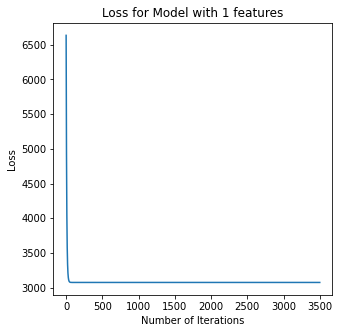

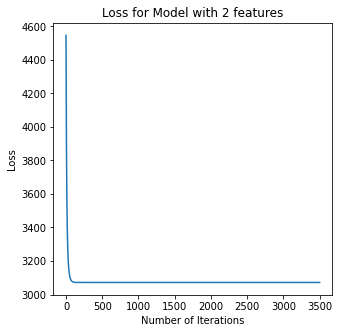

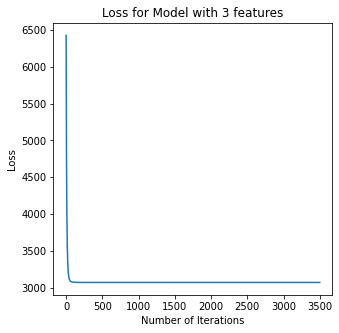

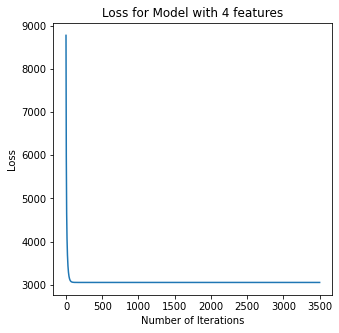

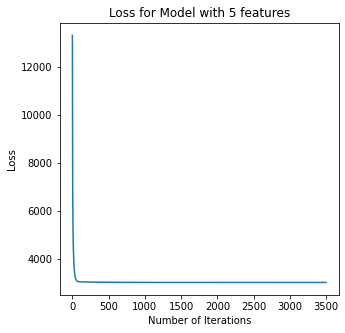

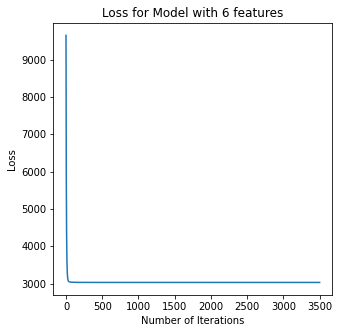

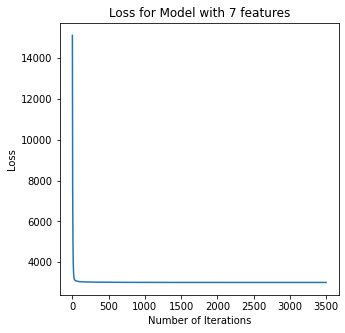

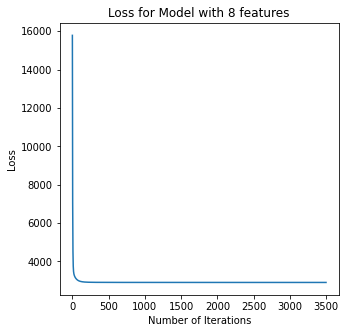

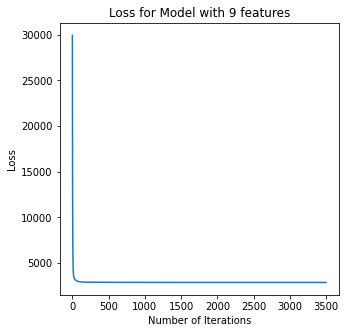

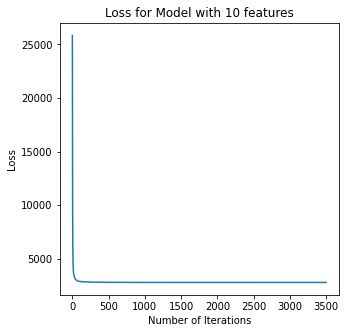

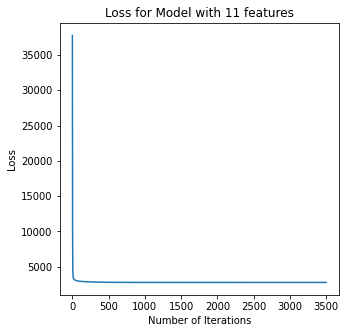

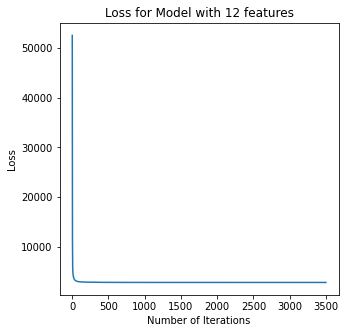

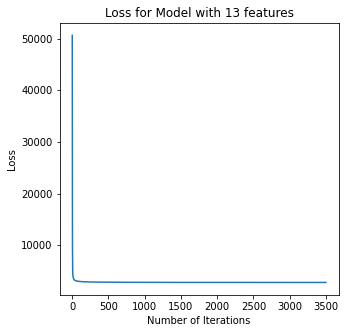

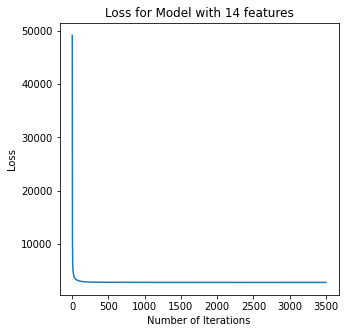

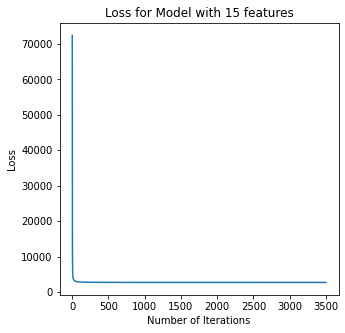

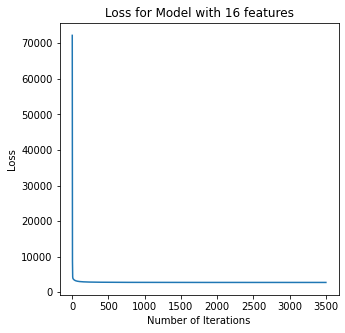

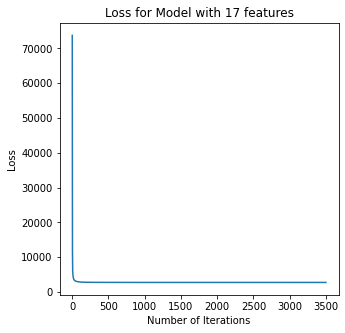

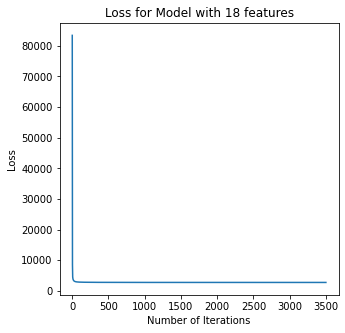

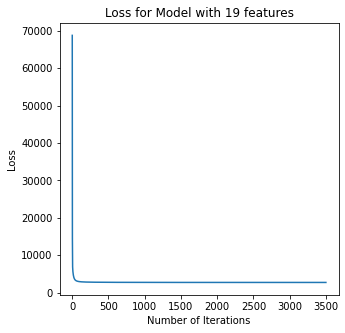

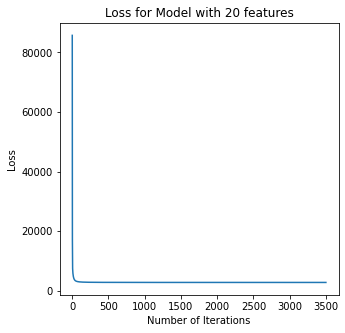

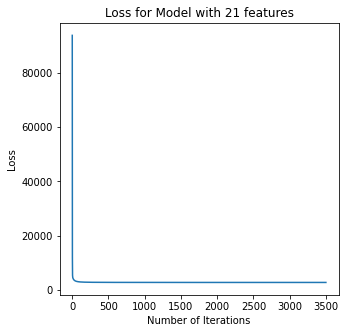

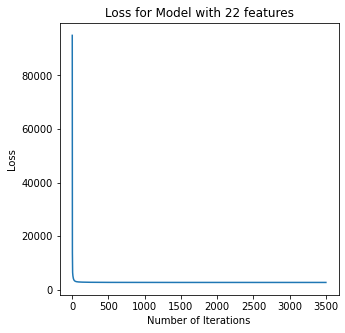

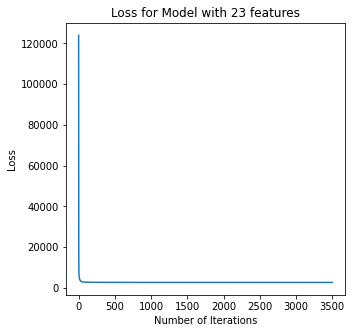

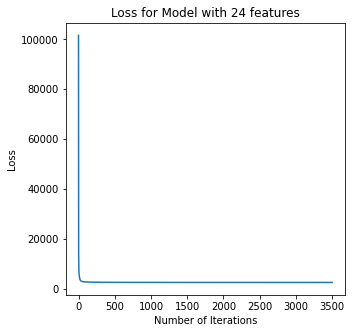

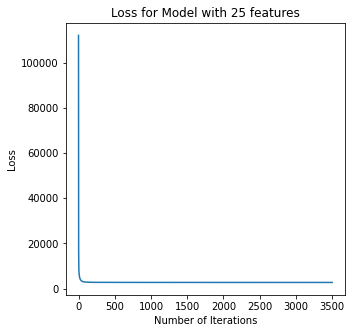

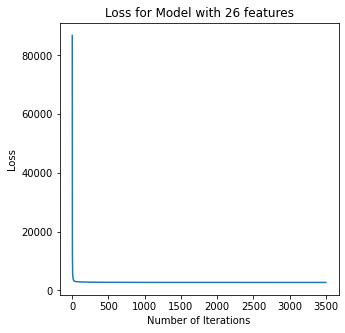

[3074.8590951001106, 3072.167489025481, 3071.987683932055, 3056.1688953989915, 3032.2149587045647, 3028.667073516115, 3005.8571458952983, 2901.352693789531, 2878.841384683013, 2788.8786440553004, 2784.5300486413707, 2783.334289393963, 2780.5194089455517, 2779.206212049567, 2763.6493587127798, 2760.9566125328624, 2758.2841225874054, 2745.982250660792, 2742.395961550416, 2738.540934489119, 2738.6693092578635, 2732.0560796168343, 2731.0634955421947, 2730.0444238805926, 2730.3788717954967, 2712.2015051687704]
[773.0678195610958, 771.8629648912333, 771.2199751659605, 771.1422156850666, 767.3755897649085, 764.7598991188563, 756.2841044688253, 733.2969539103929, 724.0447629934479, 697.019489442324, 696.0125243670385, 694.4169498663543, 693.3192982749537, 691.0192381670663, 689.2602398672716, 689.681434828283, 690.6112438787129, 684.203095100895, 683.0900827857218, 682.9120818327709, 683.1736110594419, 685.0721477407519, 684.872768580293, 684.3754177462349, 684.6773392718583, 679.9523312468903

In [96]:
# runner code for batch gradient descent
train_err = []
test_err = []
W_list = []
feature_list_each_model = []

cost_history_each_model = []

for i in range(len(x_train_list_corr)):

  W = np.random.rand(x_train_list_corr[i].shape[0], 1)

  feature_list_each_model.append(featurelist_corr[:i+1])

  W_mod, cost_hist_model = gradDescent(x_train_list_corr[i], y_train_normed.to_numpy().reshape(1, -1), W, 1e-5, 3500)

  cost_history_each_model.append(cost_hist_model)
  
  W_list.append(W_mod)
  train_err.append( cost(x_train_list_corr[i], y_train_normed.to_numpy().reshape(1, -1), W_mod) )
  
  # print(W_mod.shape)
  # print(X_test.shape)
  
  test_err.append( cost(x_test_list_corr[i], y_test_normed.to_numpy().reshape(1, -1), W_mod) )

# plotting loss

for i in range(len(cost_history_each_model)):
  plt.figure(figsize = (5, 5))
  plt.plot(cost_history_each_model[i])
  plt.title('Loss for Model with ' + str(i + 1) + ' features')
  plt.ylabel("Loss")
  plt.xlabel("Number of Iterations")
  plt.show()

print(train_err)
print(test_err)
print(feature_list_each_model)

In [97]:
error_table = pd.DataFrame({"Number of Features" : range(1, 27), "Training Error" : train_err, "Testing Error" : test_err})
error_table

,Number of Features,Training Error,Testing Error
0,1,3074.859095,773.067820
1,2,3072.167489,771.862965
2,3,3071.987684,771.219975
3,4,3056.168895,771.142216
4,5,3032.214959,767.375590
5,6,3028.667074,764.759899
6,7,3005.857146,756.284104
7,8,2901.352694,733.296954
8,9,2878.841385,724.044763
9,10,2788.878644,697.019489


In [98]:
feature_list_each_model[25]

['RH_out',
 'T6',
 'T2',
 'Windspeed',
 'T_out',
 'RH_8',
 'RH_6',
 'RH_1',
 'T3',
 'RH_2',
 'RH_7',
 'RH_9',
 'T1',
 'T4',
 'RH_3',
 'T8',
 'Press_mm_hg',
 'T7',
 'RH_4',
 'RH_5',
 'Tdewpoint',
 'T5',
 'Visibility',
 'rv1',
 'rv2',
 'T9']

In [99]:
print(np.argmin(test_err))
np.argmin(train_err)

25


25

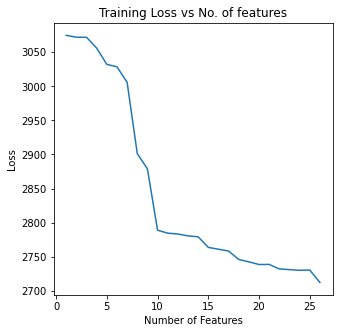

In [100]:
plt.figure(figsize = (5, 5))
plt.plot(range(1, 27), train_err)
plt.title('Training Loss vs No. of features')
plt.ylabel("Loss")
plt.xlabel("Number of Features")
plt.show()

In [101]:
# plt.figure(figsize = (10, 10))
# plt.plot(range(1, 27), train_err)
# plt.title('Training Loss vs No. of features')
# plt.ylabel("Loss")
# plt.xlabel("Number of Features")
# plt.show()

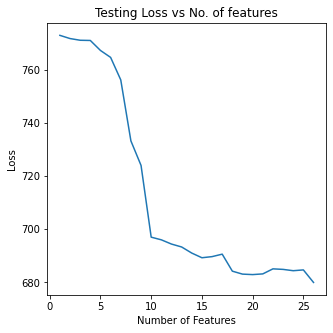

In [102]:
plt.figure(figsize = (5, 5))
plt.plot(range(1, 27), test_err)
plt.title('Testing Loss vs No. of features')
plt.ylabel("Loss")
plt.xlabel("Number of Features")
plt.show()

In [103]:
# plt.figure(figsize = (10, 10))
# plt.plot(range(1, 27), test_err)
# plt.title('Testing Loss vs No. of features')
# plt.ylabel("Loss")
# plt.xlabel("Number of Features")
# plt.show()

#PCA

In [104]:
cov_mat = df_train.iloc[:, :-1].cov()
cov_mat

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
T1,2.624207,1.124366,2.999841,0.055757,2.926708,-0.073181,2.918053,0.801099,2.687989,-0.064031,...,2.774476,0.550432,5.935955,-1.915856,-8.207088,-0.362805,-1.291752,3.953085,-0.151297,-0.151297
RH_1,1.124366,15.809451,2.366343,13.044989,2.061084,10.977115,0.961256,15.337178,1.552438,10.806170,...,0.980721,12.731380,7.301357,-8.235127,16.755110,1.922959,-0.928208,10.862732,-0.595809,-0.595809
T2,2.999841,2.366343,4.890729,-1.508516,3.289287,0.916765,3.454773,2.282787,2.982888,0.848009,...,3.018030,1.463668,9.394529,-2.254999,-16.669060,0.276539,-1.524857,5.463705,-0.521008,-0.521008
RH_2,0.055757,13.044989,-1.508516,16.893030,1.143418,9.105127,-0.291658,12.954535,0.861857,9.047619,...,0.521444,11.588143,0.675141,-7.488726,36.548477,0.556639,-0.462628,8.698804,0.299485,0.299485
T3,2.926708,2.061084,3.289287,1.143418,4.093863,-0.017237,3.541053,1.164997,3.357873,-1.055850,...,3.690348,1.144430,7.558946,-2.948460,-8.397903,-0.516613,-2.343675,5.522691,-0.039649,-0.039649
RH_3,-0.073181,10.977115,0.916765,9.105127,-0.017237,10.627564,-0.835533,12.812910,-0.257648,10.699259,...,-1.218411,11.364158,2.193924,-5.336387,17.711569,1.982876,1.002269,5.894348,-0.410530,-0.410530
T4,2.918053,0.961256,3.454773,-0.291658,3.541053,-0.835533,4.210845,-0.306029,3.349089,-1.220847,...,3.708404,-0.123264,7.331064,-1.424599,-11.764608,-0.922006,-2.381368,4.572954,-0.255275,-0.255275
RH_4,0.801099,15.337178,2.282787,12.954535,1.164997,12.812910,-0.306029,19.053036,0.811744,13.679531,...,-0.299830,15.571518,6.911880,-7.738122,22.436193,3.066894,0.478335,11.496041,-0.177460,-0.177460
T5,2.687989,1.552438,2.982888,0.861857,3.357873,-0.257648,3.349089,0.811744,3.494033,0.755027,...,3.456763,0.587181,6.528396,-2.528599,-7.599929,-0.685242,-1.681404,4.654572,-0.062919,-0.062919
RH_5,-0.064031,10.806170,0.848009,9.047619,-1.055850,10.699259,-1.220847,13.679531,0.755027,83.186545,...,-2.329002,10.160474,-1.897944,-8.099905,23.904343,1.584265,-2.446174,3.334905,-3.506835,-3.506835


In [105]:
eig_val, eig_vec = np.linalg.eigh(cov_mat)
eig_val

array([2.63677968e-16, 7.02920700e-02, 9.70640203e-02, 1.33460241e-01,
       2.17012325e-01, 2.92855913e-01, 4.03027223e-01, 4.82533436e-01,
       6.27984760e-01, 7.16956650e-01, 9.14461118e-01, 1.29840129e+00,
       2.58595503e+00, 2.65306352e+00, 3.34766275e+00, 3.92270792e+00,
       7.57584882e+00, 7.74333645e+00, 1.13862688e+01, 4.74030723e+01,
       6.69053702e+01, 1.01110456e+02, 1.35544179e+02, 1.55871522e+02,
       4.10555786e+02, 1.16081381e+03])

In [106]:
sorted_idx = np.argsort(eig_val)
sorted_idx[::-1]

array([25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1,  0])

In [107]:
sorted_eig_val = eig_val[sorted_idx[::-1]]
sorted_eig_vec = eig_vec[sorted_idx[::-1]]
sorted_eig_val
eig_vec

array([[ 0.00000000e+00, -6.48646069e-01, -4.43164907e-02,
        -2.88289033e-01,  3.46713605e-01,  1.94160539e-01,
         3.42503165e-01,  1.65852496e-01,  1.75806081e-01,
         4.32826023e-02,  7.16351469e-02, -1.43408018e-01,
        -2.97938220e-03, -6.84926201e-02, -1.16349723e-01,
         1.42997492e-01,  1.85324806e-01, -2.04043344e-01,
         1.14860427e-01, -2.95553562e-03,  3.24107207e-03,
        -1.21671609e-02,  2.91336405e-02, -5.76150729e-02,
         7.99147904e-04, -2.80590185e-02],
       [ 8.64651158e-17, -1.43663213e-01,  7.38802626e-03,
        -1.17253114e-01, -9.25890176e-02,  3.54990083e-02,
        -7.88724526e-02,  1.16708861e-01, -3.57583712e-02,
        -3.96123840e-01, -2.15300697e-01,  4.81143491e-01,
        -1.69375156e-01, -1.30932507e-01, -3.06444246e-01,
        -1.79119055e-01, -3.00743335e-01, -3.07638480e-01,
        -2.42820633e-01,  6.35267891e-02,  8.77995103e-02,
         5.14767928e-02,  1.00531051e-01, -2.41605801e-01,
        -5.13

In [108]:
sorted_eig_val

array([1.16081381e+03, 4.10555786e+02, 1.55871522e+02, 1.35544179e+02,
       1.01110456e+02, 6.69053702e+01, 4.74030723e+01, 1.13862688e+01,
       7.74333645e+00, 7.57584882e+00, 3.92270792e+00, 3.34766275e+00,
       2.65306352e+00, 2.58595503e+00, 1.29840129e+00, 9.14461118e-01,
       7.16956650e-01, 6.27984760e-01, 4.82533436e-01, 4.03027223e-01,
       2.92855913e-01, 2.17012325e-01, 1.33460241e-01, 9.70640203e-02,
       7.02920700e-02, 2.63677968e-16])

In [109]:
sorted_eig_vec.shape

(26, 26)

In [110]:
sorted_eig_val[0]
#0th eigen value

1160.8138109063382

In [111]:
sorted_eig_val[:2]
#0th and 1st eigen value

array([1160.81381091,  410.55578636])

In [112]:
sorted_eig_vec[:, 0]
#0th eigen vec

array([ 7.07106781e-01, -7.07106781e-01,  7.59955530e-16,  4.02446827e-17,
       -3.26537506e-17, -1.03325561e-16,  2.08436922e-17, -1.10527464e-15,
       -5.30020577e-16, -2.62348533e-16, -7.80850604e-17,  7.15478387e-17,
       -2.55718721e-16,  6.70023378e-16, -6.97635359e-18,  4.15885778e-16,
       -7.29779741e-17,  8.13470001e-16,  4.10334117e-16, -1.33516365e-16,
        9.02140665e-16, -3.46578919e-16, -2.26292400e-16, -6.74707629e-16,
        8.64651158e-17,  0.00000000e+00])

In [113]:
sorted_eig_vec[:, 0].T

array([ 7.07106781e-01, -7.07106781e-01,  7.59955530e-16,  4.02446827e-17,
       -3.26537506e-17, -1.03325561e-16,  2.08436922e-17, -1.10527464e-15,
       -5.30020577e-16, -2.62348533e-16, -7.80850604e-17,  7.15478387e-17,
       -2.55718721e-16,  6.70023378e-16, -6.97635359e-18,  4.15885778e-16,
       -7.29779741e-17,  8.13470001e-16,  4.10334117e-16, -1.33516365e-16,
        9.02140665e-16, -3.46578919e-16, -2.26292400e-16, -6.74707629e-16,
        8.64651158e-17,  0.00000000e+00])

In [114]:
sorted_eig_vec[:, 0:2]
#0th and 1st eigen vec

array([[ 7.07106781e-01, -3.88345188e-05],
       [-7.07106781e-01, -3.88345188e-05],
       [ 7.59955530e-16, -5.04733345e-02],
       [ 4.02446827e-17, -2.88146561e-04],
       [-3.26537506e-17,  1.33461697e-02],
       [-1.03325561e-16,  1.43922511e-02],
       [ 2.08436922e-17, -1.46980720e-03],
       [-1.10527464e-15,  9.84942507e-02],
       [-5.30020577e-16,  3.28485404e-03],
       [-2.62348533e-16, -4.02567197e-01],
       [-7.80850604e-17,  3.95534351e-03],
       [ 7.15478387e-17,  8.35222018e-02],
       [-2.55718721e-16, -2.52150906e-02],
       [ 6.70023378e-16,  1.74470732e-01],
       [-6.97635359e-18, -1.11121255e-04],
       [ 4.15885778e-16, -5.79791306e-02],
       [-7.29779741e-17, -3.70549765e-03],
       [ 8.13470001e-16,  8.91308705e-02],
       [ 4.10334117e-16, -1.48989434e-02],
       [-1.33516365e-16,  3.73768848e-02],
       [ 9.02140665e-16, -3.74590479e-02],
       [-3.46578919e-16,  1.51812959e-01],
       [-2.26292400e-16,  2.02307638e-01],
       [-6.

In [115]:
sorted_eig_vec[:, 0:2].T

array([[ 7.07106781e-01, -7.07106781e-01,  7.59955530e-16,
         4.02446827e-17, -3.26537506e-17, -1.03325561e-16,
         2.08436922e-17, -1.10527464e-15, -5.30020577e-16,
        -2.62348533e-16, -7.80850604e-17,  7.15478387e-17,
        -2.55718721e-16,  6.70023378e-16, -6.97635359e-18,
         4.15885778e-16, -7.29779741e-17,  8.13470001e-16,
         4.10334117e-16, -1.33516365e-16,  9.02140665e-16,
        -3.46578919e-16, -2.26292400e-16, -6.74707629e-16,
         8.64651158e-17,  0.00000000e+00],
       [-3.88345188e-05, -3.88345188e-05, -5.04733345e-02,
        -2.88146561e-04,  1.33461697e-02,  1.43922511e-02,
        -1.46980720e-03,  9.84942507e-02,  3.28485404e-03,
        -4.02567197e-01,  3.95534351e-03,  8.35222018e-02,
        -2.52150906e-02,  1.74470732e-01, -1.11121255e-04,
        -5.79791306e-02, -3.70549765e-03,  8.91308705e-02,
        -1.48989434e-02,  3.73768848e-02, -3.74590479e-02,
         1.51812959e-01,  2.02307638e-01,  5.17230144e-01,
        -1.43

In [116]:
sorted_eig_vec[:, 0:2].T.shape

(2, 26)

In [117]:
len(sorted_eig_vec[0])

26

In [118]:
len(sorted_eig_vec[:, 0 : 26])

26

In [119]:
len(sorted_eig_val)

26

In [120]:
perc_var = []
for i in range(len(sorted_eig_val)):
  perc_var.append(np.sum(sorted_eig_val[: i + 1]) * 100 / np.sum(sorted_eig_val))

perc_var_df = pd.DataFrame({"No. of features" : range(1, 27), "Eigen Value" : sorted_eig_val.round(9), "Percentage of Variance Captured" : perc_var})
# perc_var_df.style.format("{:.8f}")
perc_var_df

,No. of features,Eigen Value,Percentage of Variance Captured
0,1,1160.813811,54.686415
1,2,410.555786,74.027866
2,3,155.871522,81.371038
3,4,135.544179,87.756580
4,5,101.110456,92.519935
5,6,66.905370,95.671874
6,7,47.403072,97.905052
7,8,11.386269,98.441464
8,9,7.743336,98.806256
9,10,7.575849,99.163157


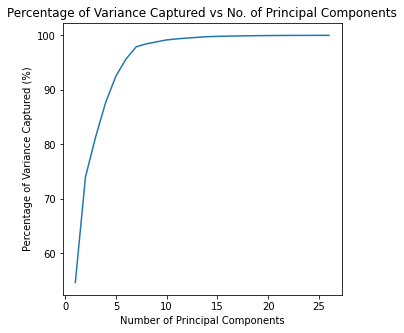

[54.68641482537207,
 74.0278663406291,
 81.37103768882707,
 87.75657957575619,
 92.51993462116194,
 95.67187405811163,
 97.90505223974252,
 98.44146403362409,
 98.80625579033145,
 99.16315713587167,
 99.34795751521307,
 99.50566728088,
 99.63065419177204,
 99.75247959418957,
 99.81364781142986,
 99.85672844985243,
 99.89050457173532,
 99.92008919139576,
 99.94282153952557,
 99.96180831733207,
 99.97560487954028,
 99.98582841921296,
 99.99211578593001,
 99.99668851174599,
 100.0,
 100.0]

In [121]:
plt.figure(figsize = (5, 5))
plt.plot(range(1, 27), perc_var)
plt.title('Percentage of Variance Captured vs No. of Principal Components')
plt.ylabel("Percentage of Variance Captured (%)")
plt.xlabel("Number of Principal Components")
plt.show()
perc_var

In [122]:
# plt.figure(figsize = (10, 10))
# plt.plot(range(1, 27), perc_var)
# plt.title('Percentage of Variance Captured vs No. of Principal Components')
# plt.ylabel("Percentage of Variance Captured (%)")
# plt.xlabel("Number of Principal Components")
# plt.show()
# perc_var

In [123]:
pd.concat([pd.DataFrame(np.ones((1, x_train.shape[1]))), pd.DataFrame(np.dot(sorted_eig_vec[:, 0 : 2].T, x_train))]).reset_index(drop = True)

,0,1,2,3,4,5,6,7,8,9,...,6305,6306,6307,6308,6309,6310,6311,6312,6313,6314
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.475650,1.099951,-1.133176,-0.030092,-0.541362,0.166163,0.513746,0.369938,-1.529265,-0.277468,...,0.010277,-1.518675,-0.60073,-1.028498,-1.410706,-0.705839,-0.208892,-0.170156,0.435683,-2.401630
2,-0.386064,0.022035,1.015833,-2.518800,0.406028,-0.449579,1.290367,-0.212549,2.533266,-1.304678,...,-0.034542,0.581360,0.81361,1.052540,-0.113430,-0.860425,-2.911589,0.000016,1.048408,0.866934


In [124]:
x_train_list_corr[1]

,0,1,2,3,4,5,6,7,8,9,...,6305,6306,6307,6308,6309,6310,6311,6312,6313,6314
Const,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RH_out,0.554044,0.019421,0.943873,0.821355,-1.473067,-0.359270,1.044115,0.609734,0.052835,-1.896310,...,-0.359270,0.086249,0.620872,-0.626581,0.219905,0.019421,0.843631,0.888183,-0.815927,0.676562
T6,-1.101886,0.235035,0.042083,-1.183245,0.815777,0.327389,-0.012339,-0.865506,0.393905,0.871613,...,1.872105,-0.030480,-1.205234,0.004153,-0.634623,-0.376804,-0.721479,0.447778,0.360372,-0.309738


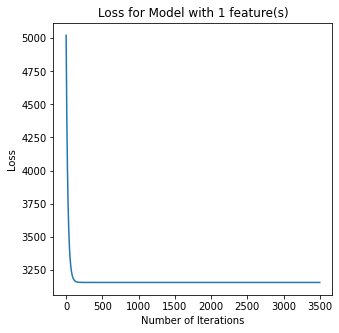

[3154.033738938705]
[790.1266745121334]
[0.5468641482537206]


In [125]:
#testing for 1 model

train_err_PCA = []
test_err_PCA = []
W_list_PCA = []
perc_var_captured_list = []

cost_history_each_model_PCA = []

#i+1 = no. of components
for i in range(1):#len(sorted_eig_val)):  #i ranges from 0 to len(sorted_eig_val)-1 which is from 0 to 25
  eval = sorted_eig_val[i]
  # print(sorted_eig_val[: i + 1])
  perc_var_captured_list.append(np.sum(sorted_eig_val[: i + 1]) / np.sum(sorted_eig_val))
  evec_sub = sorted_eig_vec[:, 0 : i + 1]
  # x_train_reduced = np.dot(evec_sub.T, x_train)
  x_train_reduced = pd.concat([pd.DataFrame(np.ones((1, x_train.shape[1]))), pd.DataFrame(np.dot(evec_sub.T, x_train))]).reset_index(drop = True)
  # x_test_reduced = np.dot(evec_sub.T, x_test)
  x_test_reduced = pd.concat([pd.DataFrame(np.ones((1, x_test.shape[1]))), pd.DataFrame(np.dot(evec_sub.T, x_test))]).reset_index(drop = True)

  W_PCA = np.random.rand(x_train_reduced.shape[0], 1)
  
  #x_train_list_corr[i] -> x_train_reduced
  
  W_mod_PCA, cost_hist_model_PCA = gradDescent(x_train_reduced, y_train_normed.to_numpy().reshape(1, -1), W_PCA, 3.5*1e-6, 3500)

  cost_history_each_model_PCA.append(cost_hist_model_PCA)
  
  W_list_PCA.append(W_mod_PCA)
  train_err_PCA.append( cost(x_train_reduced, y_train_normed.to_numpy().reshape(1, -1), W_mod_PCA) )
  
  # print(W_mod.shape)
  # print(X_test.shape)
  
  test_err_PCA.append( cost(x_test_reduced, y_test_normed.to_numpy().reshape(1, -1), W_mod_PCA) )

# plotting loss

for i in range(len(cost_history_each_model_PCA)):
  plt.figure(figsize = (5, 5))
  plt.plot(cost_history_each_model_PCA[i])
  plt.title('Loss for Model with ' + str(i + 1) + ' feature(s)')
  plt.ylabel("Loss")
  plt.xlabel("Number of Iterations")
  plt.show()

print(train_err_PCA)
print(test_err_PCA)
print(perc_var_captured_list)

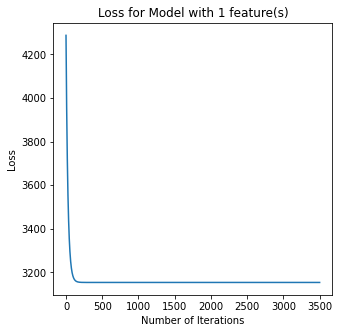

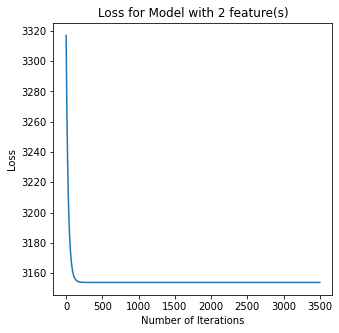

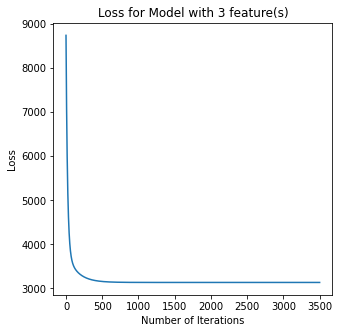

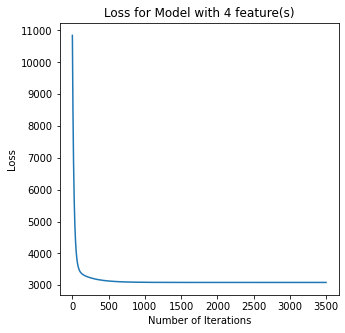

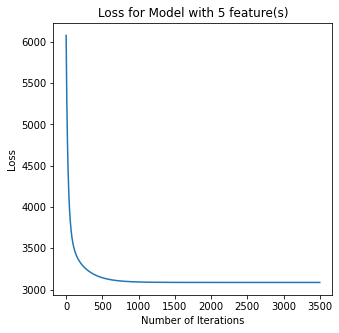

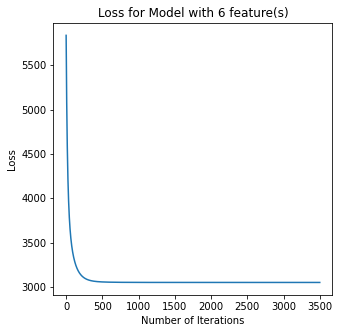

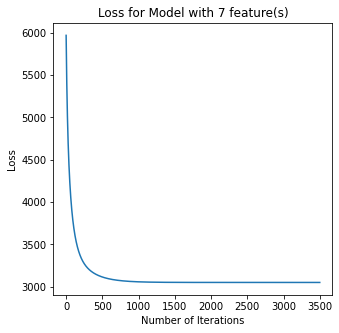

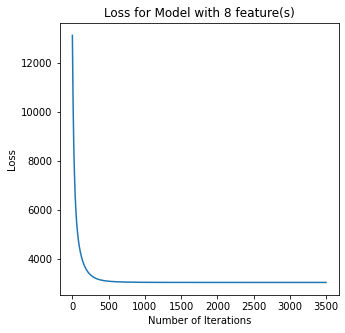

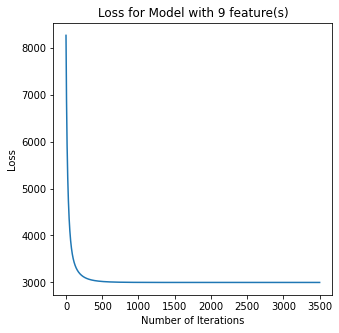

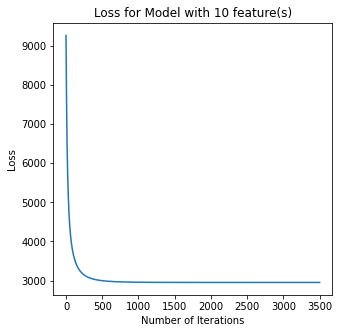

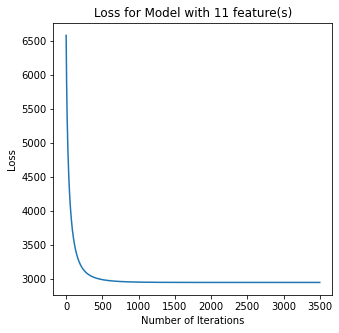

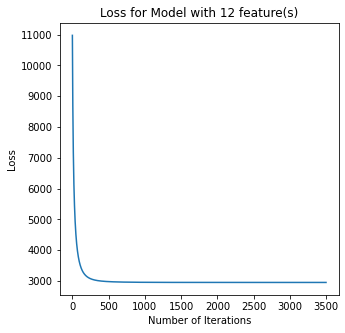

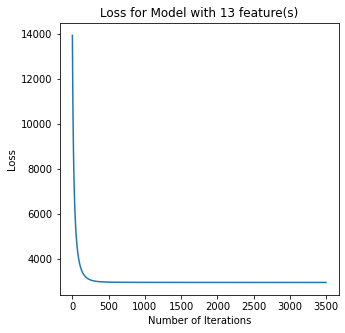

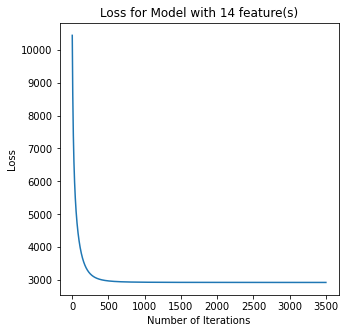

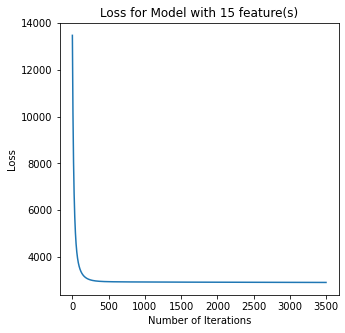

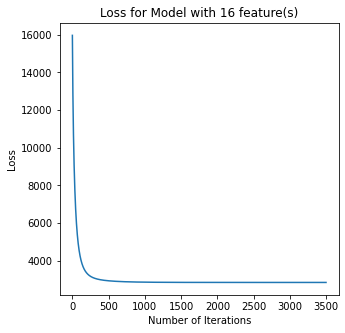

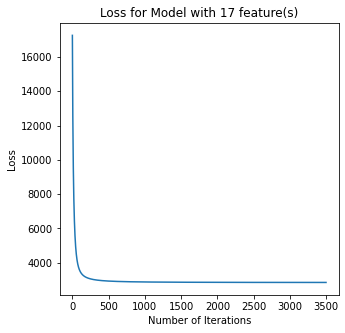

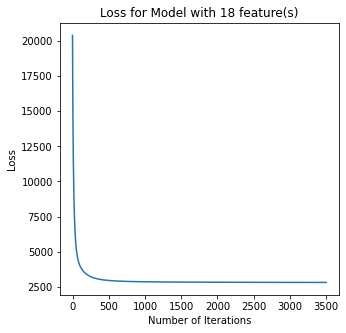

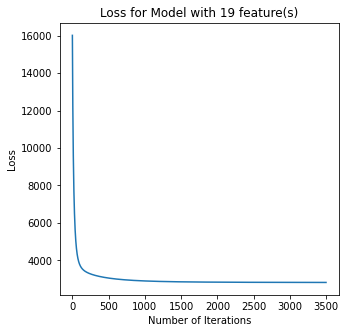

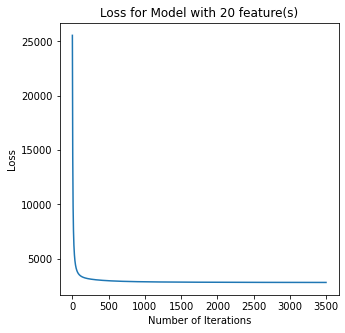

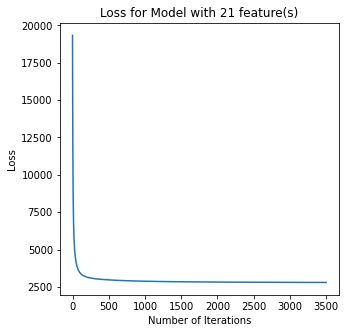

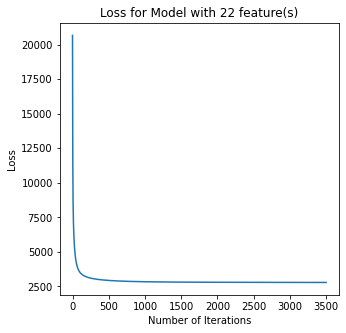

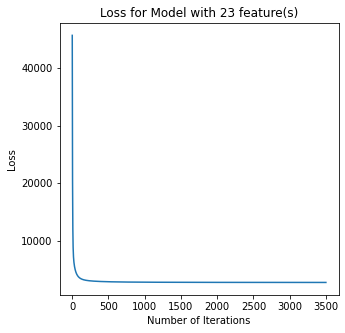

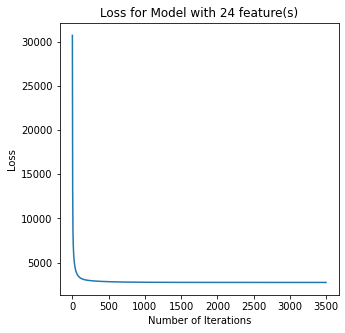

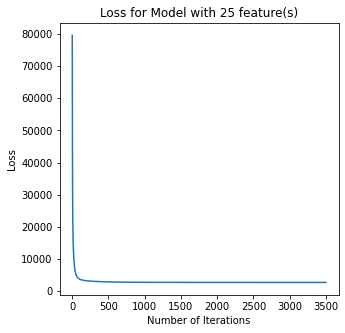

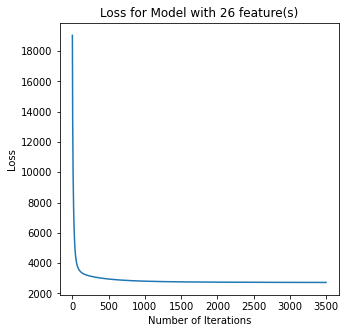

[3154.033738938705, 3153.8254641618187, 3136.3310510191777, 3087.1470348139705, 3086.129487440424, 3049.7887008249413, 3049.7181086666546, 3042.571829035257, 2999.781631851118, 2952.446790381916, 2951.2427004922542, 2950.7399777275054, 2949.1116572807, 2931.525115827476, 2904.9133850129783, 2858.0094924151454, 2840.0744580887763, 2825.3537190014313, 2823.562029087293, 2825.6841241032876, 2797.0274196019836, 2788.9546531892315, 2771.340116742481, 2755.3168977712903, 2730.614257663568, 2723.137669658658]
[790.1266745121334, 790.1564437203892, 788.20809220676, 778.823156424754, 777.57099667287, 772.8157727807325, 772.7325103759632, 769.7629461444062, 767.1288109629861, 746.5103503079674, 745.7771303256518, 745.8750473635444, 744.7114825264172, 743.2853141219268, 736.0639049081783, 723.0686606802844, 716.1924740626187, 712.2582184750286, 711.979811208307, 711.026575510964, 702.7168373310358, 701.3858513272941, 695.7839737894442, 690.620460636979, 679.8007288170096, 680.8942698654103]
[0.54

In [126]:
#running batch gradient descent for PCA'd features

train_err_PCA = []
test_err_PCA = []
W_list_PCA = []
perc_var_captured_list = []

cost_history_each_model_PCA = []

#i+1 = no. of components
for i in range(len(sorted_eig_val)):  #i ranges from 0 to len(sorted_eig_val)-1 which is from 0 to 25
  eval = sorted_eig_val[i]
  
  # print(sorted_eig_val[: i + 1])
  perc_var_captured_list.append(np.sum(sorted_eig_val[: i + 1]) / np.sum(sorted_eig_val))
  
  evec_sub = sorted_eig_vec[:, 0 : i + 1]
  
  # x_train_reduced = np.dot(evec_sub.T, x_train)
  x_train_reduced = pd.concat([pd.DataFrame(np.ones((1, x_train.shape[1]))), pd.DataFrame(np.dot(evec_sub.T, x_train))]).reset_index(drop = True)
  # x_test_reduced = np.dot(evec_sub.T, x_test)
  x_test_reduced = pd.concat([pd.DataFrame(np.ones((1, x_test.shape[1]))), pd.DataFrame(np.dot(evec_sub.T, x_test))]).reset_index(drop = True)

  W_PCA = np.random.rand(x_train_reduced.shape[0], 1)
  
  #x_train_list_corr[i] -> x_train_reduced
  
  W_mod_PCA, cost_hist_model_PCA = gradDescent(x_train_reduced, y_train_normed.to_numpy().reshape(1, -1), W_PCA, 3.5*1e-6, 3500)

  cost_history_each_model_PCA.append(cost_hist_model_PCA)
  
  W_list_PCA.append(W_mod_PCA)
  train_err_PCA.append( cost(x_train_reduced, y_train_normed.to_numpy().reshape(1, -1), W_mod_PCA) )
  
  # print(W_mod.shape)
  # print(X_test.shape)
  
  test_err_PCA.append( cost(x_test_reduced, y_test_normed.to_numpy().reshape(1, -1), W_mod_PCA) )

# plotting loss

for i in range(len(cost_history_each_model_PCA)):
  plt.figure(figsize = (5, 5))
  plt.plot(cost_history_each_model_PCA[i])
  plt.title('Loss for Model with ' + str(i + 1) + ' feature(s)')
  plt.ylabel("Loss")
  plt.xlabel("Number of Iterations")
  plt.show()

print(train_err_PCA)
print(test_err_PCA)
print(perc_var_captured_list)

In [127]:
error_table_PCA = pd.DataFrame({"Number of Principal Components" : range(1, 27), "Percentage of Variance Captured": perc_var, "Training Error" : train_err_PCA, "Testing Error" : test_err_PCA})
error_table_PCA

,Number of Principal Components,Percentage of Variance Captured,Training Error,Testing Error
0,1,54.686415,3154.033739,790.126675
1,2,74.027866,3153.825464,790.156444
2,3,81.371038,3136.331051,788.208092
3,4,87.756580,3087.147035,778.823156
4,5,92.519935,3086.129487,777.570997
5,6,95.671874,3049.788701,772.815773
6,7,97.905052,3049.718109,772.732510
7,8,98.441464,3042.571829,769.762946
8,9,98.806256,2999.781632,767.128811
9,10,99.163157,2952.446790,746.510350


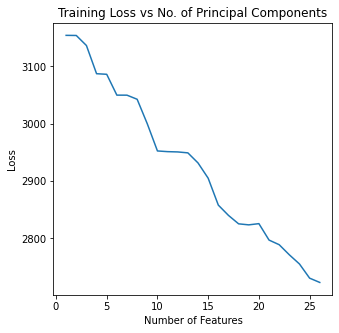

In [128]:
plt.figure(figsize = (5, 5))
plt.plot(range(1, 27), train_err_PCA)
plt.title('Training Loss vs No. of Principal Components')
plt.ylabel("Loss")
plt.xlabel("Number of Features")
plt.show()

In [129]:
# plt.figure(figsize = (10, 10))
# plt.plot(range(1, 27), train_err_PCA)
# plt.title('Training Loss vs No. of Principal Components')
# plt.ylabel("Loss")
# plt.xlabel("Number of Features")
# plt.show()

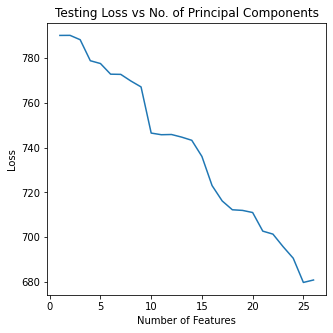

In [130]:
plt.figure(figsize = (5, 5))
plt.plot(range(1, 27), test_err_PCA)
plt.title('Testing Loss vs No. of Principal Components')
plt.ylabel("Loss")
plt.xlabel("Number of Features")
plt.show()

In [131]:
# plt.figure(figsize = (10, 10))
# plt.plot(range(1, 27), test_err_PCA)
# plt.title('Testing Loss vs No. of Principal Components')
# plt.ylabel("Loss")
# plt.xlabel("Number of Features")
# plt.show()

In [132]:
np.argsort(train_err_PCA)
#prints increasing order of training error

array([25, 24, 23, 22, 21, 20, 18, 17, 19, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1,  0])

In [133]:
np.argsort(test_err_PCA)
#prints increasing order of testing error

array([24, 25, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 10, 11,  9,
        8,  7,  6,  5,  4,  3,  2,  0,  1])